# 05 Feature space

#### Visualiser sammenhængen mellem karakter og review i et feature space.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fasttext

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

### Functions

In [3]:
def train_csv_file(file):
    data = pd.read_csv('./data/' + file + '.csv')

    model = fasttext.load_model('./data/fasttext_trained_model.bin')
    data['vec'] = data['review'].apply(lambda x: model.get_sentence_vector(x))
    return data, model, data['vec']

In [4]:
def nearest_neighbours(*args):
    df_lists = []
    
    for arg in args:
        all_args_nearest_neighbours = model[1].get_nearest_neighbors(arg)       
        single_arg_list = []
        
        for k, v in all_args_nearest_neighbours: 
            single_arg_list.append(v)
        df_lists.append(single_arg_list)

    nearest_neighbours_df = pd.DataFrame(list(zip(*df_lists[0:])), columns=args)
    return nearest_neighbours_df

In [5]:
def legends_handler(cluster, model, scatter):
    # dc = data_cluster
    # cc = cluster_colors
    # cl = cluster_labels
    dc = cluster.value_counts()
    dc = -np.sort(-dc)
    cc = cluster.value_counts().index.tolist()

    cl = []
    for i in model.labels:
        cl.append(i.replace('__',''))

    handles = scatter.legend_elements(num=cc)[0]  # extract the handles from the existing scatter plot
    return  cl, dc, handles

In [29]:
def cluster_2d():

    kmeans = KMeans(n_clusters=len(model[1].labels))
    model[0]['cluster'] = kmeans.fit_predict(model[2].values.tolist())

    pca = PCA(n_components=3)
    model[0]['x'] = pca.fit_transform(model[0]['vec'].values.tolist())[:,0]
    model[0]['y'] = pca.fit_transform(model[0]['vec'].values.tolist())[:,1]
    model[0]['z'] = pca.fit_transform(model[0]['vec'].values.tolist())[:,2]
    
    fig = plt.figure(1, figsize=(15,5))
    
    scatter = plt.scatter(model[0]['x'], model[0]['y'], c=model[0]['cluster'], cmap='rainbow', alpha=0.5)

    lh = legends_handler(model[0]['cluster'], model[1], scatter)

    plt.title("Review Clustering using K Means (2d)", fontsize=14)
    plt.legend(title='Classes', handles=lh[2], 
               labels=[lh[0][0]+' '+str(lh[1][0]),
                       lh[0][1]+' '+str(lh[1][1]),
                       lh[0][2]+' '+str(lh[1][2]),
                       lh[0][3]+' '+str(lh[1][3]),
                       lh[0][4]+' '+str(lh[1][4])])
    return plt.show()

In [27]:
def cluster_3d():
    fig = plt.figure(1, figsize=(10,10))
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    scatter = ax.scatter(model[0]['x'],model[0]['y'],model[0]['z'], c=model[0]['cluster'], cmap='rainbow', alpha=0.5)

    lh = legends_handler(model[0]['cluster'], model[1], scatter)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_facecolor('white')
    
    plt.title("Review Clustering using K Means (3d)", fontsize=14)
    plt.legend(title='Classes', handles=lh[2], 
               labels=[lh[0][0]+' '+str(lh[1][0]),
                       lh[0][1]+' '+str(lh[1][1]),
                       lh[0][2]+' '+str(lh[1][2]),
                       lh[0][3]+' '+str(lh[1][3]),
                       lh[0][4]+' '+str(lh[1][4])])
    return plt.show()

### Execute

In [43]:
filename = "komplett"
model=train_csv_file(filename)

In [48]:
nearest_neighbours('levering', 'service', 'penge', 'løgn')

,levering,service,penge,løgn
0,orden,brugeog,binde,dem.gider
1,iorden,tilmed,cirklen,",fub"
2,afhentning.super,computerfirmaså,bjergged.,svindel.dårlig
3,kreditere,emner.,centreaeret.,forhandlere.har
4,bedril,liv,fordøjet,forløbet(hvilket
5,velfungerende.ikke,returneringen.,squidgame,temmiligt
6,igennemgod,antaget.,bladetså,omsonstda
7,bestillinghurtig,særdeles,4hvilket,reply”
8,internet-butikkerså,",det.var",(download),brygget
9,homecinema,morgen(lørdag)i,2205gold,hovedstikket.


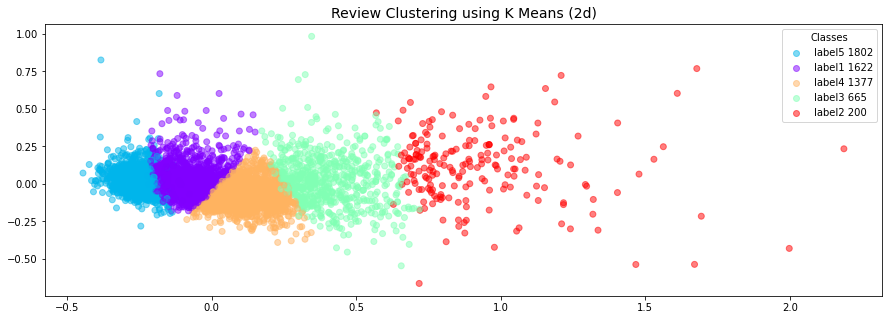

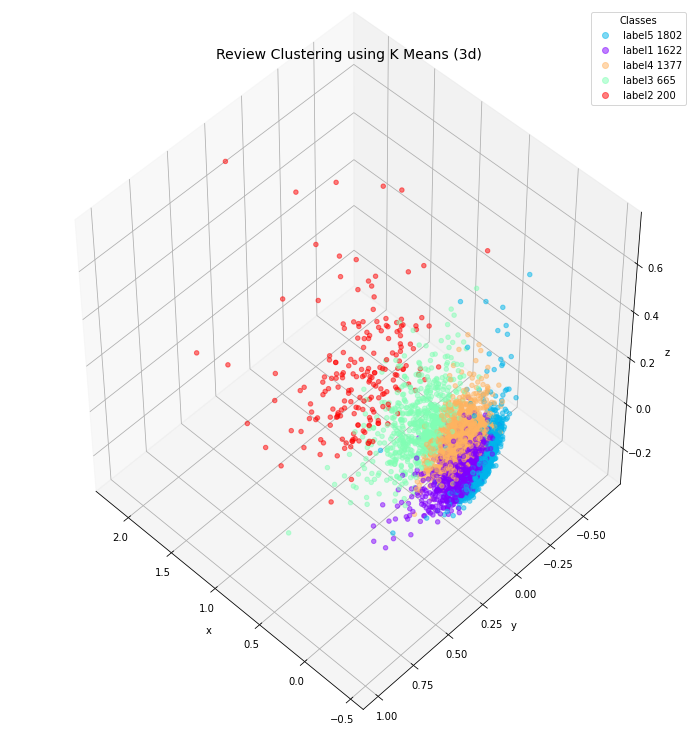

In [49]:
cluster_2d()
cluster_3d()